# 9-1. 들어가며

1. 학습 목표
- 트랜스포머 이전의 Attention 기법에 대해 간단하게 복습한다.
- 트랜스포머에 포함된 모듈들을 심층적으로 이해한다.
- 트랜스포머를 발전시키기 위해 적용된 여러 테크닉들을 알아본다.

# 9-2. Attention의 역사

트랜스포머를 배우기 전에 Seq2seq2와 Attention을 간단하게 복습한다.

Seq2seq는 기계 번역에서 좋은 성능을 보였주었다. 기존의 단일 RNN은 번역에 적합한 구조가 아니었으나 두 개의 RNN을 결합한 Encoder-Decoder 구조를 만들어 문맥 전체를 반영한 번역이 가능하게됐다.

Ex)

Before)
Step 1: [나는] -> [I]

Step 2: [나는] [점심을] -> [I] [lunch]

Step 3: [나는] [점심을] [먹는다] -> [I] [lunch] [eat(?)]

After)
Encode(나는 점심을 먹는다)

-> 고정된 크기의 컨텍스트 벡터

-> Decode(컨텍스트 벡터) = I eat lunch!

![](https://d3s0tskafalll9.cloudfront.net/media/images/GN-5-L-2.max-800x600.jpg)
<center>Seq2Seq 구조</center>

단순한 RNN은 긴 문장을 학습시키기 힘들기 때문에 Seq2seq에서는 LSTM을 사용한 Encoder-Decoder구조를 채책하였다.

논문에서는 다음과 같이 표현한다.

Encder에 Input Sequence X를 넣으면 고정된 크기의  Representation Vector v에 모든 정보를 담아 Decoder에게 전달해 주는 구조

Decoder는 전달받은 v를 기반으로 Output Sequence y를 생상한다. 추가로 v는 컨텍스트 벡터라고 불린다.

하지만 고정된 크기의 컨텍스트 벡터를 사용하는 것은 필연적으로 정보의 손실을 야기한다. 특히 문장이 길어지면 더욱 손실이 커진다.

단순하게 생각해서 컨텍스트 벡터가 모든 Embedding의 평균이라 하면 3단어를 포함하는 문장과 100단어를 포함하는 문장 중 손실이 일어나는 쪽은 100단어를 포함하는 문장이다.

그래서 몸든 단어를 같은 비중으로 압축하지 말고, 번역하는 데에 중요한 단어만 큰 비중을 줘 성능을 높여보자고 나온 것이 Bahdanau(바다나우) Attention이다.

[Bahdanau Attention Map](https://eda-ai-lab.tistory.com/157)

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/GN-5-L-3.jpg)
<center>Bahdanau Attention 논문에 포함된 Attention Map</center>

대각선이 역행하는 uropean Economic Area 부분을 잘보면 같은 의미의 불어 zone economique europeenne과 의미적으로 유사한 것들끼리 연결된 것을 볼 수 있습니다.

Bahdanau Attention의 문제라면 T스텝에서 Decoder의 Hidden State를 구하기 위해 T-1 스텝의 Hidden State를 사용해야한다는 것이다.

이는 재귀적으로 동작하는 RNN에 역행하는 연산이므로 효율적이지 못하다. 이를 개선하고자 나온 것이 Luong Attention이다.

[ Luong Attention](https://hcnoh.github.io/2019-01-01-luong-attention)





# 9-3. Attention Is All You Need!

2017년 Attention Is All You Need라는 논문이 발표되었다.

이 논문의 서론 한 구절을 살펴보자.

- We propose a new simple network architecture, the Transformer, based solely on attention mechanisms, dispensing with recurrence and convolutions entirely.

- 우리는 RNN과 CNN을 완전히 배제하고 Attention 메커니즘에만 기반을 둔 새롭고 단순한 구조, Transformer를 제안합니다.

언어를 모델링하기 위한 RNN이었는데 이를 배제한다고하니 충격적인 내용이다. 그간 RNN은 많은 발전을 이루었지만 고질적인 기울기 소실은 해소되지 못했다. 그럼에도 문장 데이터의 순차적인 특성을 유지하기 위해 사용이 필연적이라고 생각했다.

심지어 순차적인 계산이라는 특성은 병렬 처리가 불가능하다는 문제점을 가지고있다. 이런 문제를 해소하기위해 트랜스포머는 등장하게 된 것이다.

[Attention Is All You Need](https://arxiv.org/pdf/1706.03762.pdf)

이 논문에서 문장에서 연속성이라는 개념을 배제하였다. 대신 Attention으로 각 단어들의 상관관계를 구하는데 집중하였다. 우리는 앞에서 문장을 모델링 한다는 것은 주어진 단어를 보고 모르는 단어에 확률을 할당하는 것이라고 배웠다.

연속성이 배제된 채로 문장을 모델링 한다는 것은, 단순하게 생각하면 입력으로 [빨간, 사과, 노란, 바나나]가 들어가는 것과 [노란, 사과, 빨간, 바나나]가 들어가는 것이 동일하게 취급되는 셈이다.

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/GN-5-L-4.jpg)
<center>트랜스포머의 구조</center>

트랜스포머는 Seq2seq에서 제안된 Encoder-Decoder 구조를 사용한다. 대신 그 안에는 LSTM 대신 다영한 모듈을 넣었다. 그리고 Encoder, Decoder를 6개 쌓아올려 모델을 완성합니다.

모델은 Encoder를 6번 겹치고 그 다음에 Decoder를 6번 겹친다. 서로 겹쳐가면 쌓는것이 아니다.






# 9-4. Positional Encoding

이번 단계에서는 알아볼 내용은 Positional Encoding 부분입니다.

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/GN-5-L-5.jpg)
<center>트랜스포머 구조 - Positional Encoding</center>

이전 단계에서 문장의 연속성을 배제할 경우 [빨간, 사과, 노란, 바나나]와 [노란, 사과, 빨간, 바나나]를 같은 문장으로 간주하게 된다고했다. Positional Encoding은 그런 것을 막기위한 방법이다. 즉, 문장에 연속성을 부여하는 새로운 방법을 제시한 것이다.

쉽게 말하면 입력이 들어온 순서대로 단어에 표기를 하는 것과 같습니다. 예를들어 [빨간+1] [사과+2] [노란+3] [바나나+4]과 같은 모양새이다.

하지만 그렇다고 단어 Embedding에 선형적으로 증가하는 값을 더해줬다간 후에 데이터의 분포가 엉망이 된다. 

문제없이 Position을 나타내는 방법은 아래 링크를 참고하고 질문에 답을 해보도록한다.

[jeongstudy: positional encoding이란 무엇인가](https://skyjwoo.tistory.com/31)

Q1. 글의 저자가 제시한 Positional Encoding의 두 가지 방법과 그 한계는 각각 무엇인가요?

방법)

1. 데이터에 0~1사이의 label을 붙인다
- 문장의 길이에 따라 더해지는 값이 가변적이다. 따라서 단어 간의 거리(Delta)가 일정하지 않다.

2. 각 time-step마다 선형적으로 숫자를 할당하는 것이다.
- 단어 간의 거리(Delta)가 일정해지는 것은 좋지만 범위가 무제한이기 때문에 값이 매우 커질 수 있고 모델이 일반화하기 어려워진다.


Q2. Positional Encoding이 만족해야 할 4가지 조건을 적어보세요.

1. 각 time-step(문장에서 단어의 위치)마다 하나의 유일한 encoding 값을 출력해 내야 한다. 

2. 서로 다른 길이의 문장에 있어서 두 time-step 간 거리는 일정해야 한다.

3. 모델에 대한 일반화가 가능해야 한다. 더 긴 길이의 문장이 나왔을 때 적용될 수 있어야 한다. 즉, 순서를 나타내는 값 들이 특정 범위 내에 있어야 한다.

4. 하나의 key 값처럼 결정되어야 한다. 매번 다른 값이 나와선 안된다.

논문에서 사용한 Positional Encoding 수식은 아래와 같습니다.

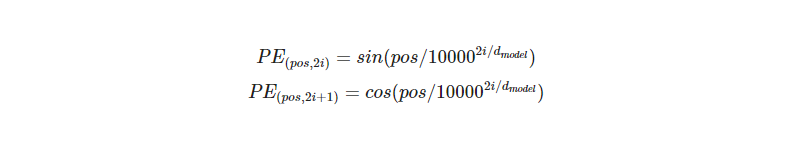

pos는 단어가 위치한 Time-step을 의미하며 i는 Encoding 차원의 Index, d_model은 모델의 Embedding 차원 수입니다. 이를 Sinusoid(사인파) Embedding이라고 칭합니다.

In [1]:
# Sinusoid(사인파) Embedding 구현

import numpy as np

def positional_encoding(pos, d_model):
  def cal_angle(position, i):
    return position / np.power(10000, int(i) / d_model)

  def get_posi_angle_vec(position):
    return [cal_angle(position, i) for i in range(d_model)]

  sinusoid_table = np.array([get_posi_angle_vec(pos_i) for pos_i in range(pos)])

  sinusoid_table[:, 0::2] = np.sin(sinusoid_table[:, 0::2])
  sinusoid_table[:, 1::2] = np.cos(sinusoid_table[:, 1::2])

  return sinusoid_table

pos = 7
d_model = 4
i = 0

print('Positional Encoding 값:\n', positional_encoding(pos, d_model))

print('-'*80)
print('if pos == 0, i == 0: ', np.sin(0 / np.power(10000, 2 * i / d_model))) # np.power : 단일 숫자의 제곱 형태
print('if pos == 1, i == 0: ', np.sin(1 / np.power(10000, 2 * i / d_model)))
print('if pos == 2, i == 0: ', np.sin(2 / np.power(10000, 2 * i / d_model)))
print('if pos == 3, i == 0: ', np.sin(3 / np.power(10000, 2 * i / d_model)))

print('-'*80)
print("if pos == 0, i == 1: ", np.cos(0 / np.power(10000, 2 * i + 1 / d_model)))
print("if pos == 1, i == 1: ", np.cos(1 / np.power(10000, 2 * i + 1 / d_model)))
print("if pos == 2, i == 1: ", np.cos(2 / np.power(10000, 2 * i + 1 / d_model)))
print("if pos == 3, i == 1: ", np.cos(3 / np.power(10000, 2 * i + 1 / d_model)))

Positional Encoding 값:
 [[ 0.          1.          0.          1.        ]
 [ 0.84147098  0.99500417  0.00999983  0.9999995 ]
 [ 0.90929743  0.98006658  0.01999867  0.999998  ]
 [ 0.14112001  0.95533649  0.0299955   0.9999955 ]
 [-0.7568025   0.92106099  0.03998933  0.999992  ]
 [-0.95892427  0.87758256  0.04997917  0.9999875 ]
 [-0.2794155   0.82533561  0.05996401  0.999982  ]]
--------------------------------------------------------------------------------
if pos == 0, i == 0:  0.0
if pos == 1, i == 0:  0.8414709848078965
if pos == 2, i == 0:  0.9092974268256817
if pos == 3, i == 0:  0.1411200080598672
--------------------------------------------------------------------------------
if pos == 0, i == 1:  1.0
if pos == 1, i == 1:  0.9950041652780258
if pos == 2, i == 1:  0.9800665778412416
if pos == 3, i == 1:  0.955336489125606


개념을 이해할 때 효율적인 코드보다 직접 값을 대입해보며 하드 코딩을 해보는 것이 제법 도움이 됩니다. 위 예제의 걍우, 직접 Positional Encoding의 1번째 열과 2번째 열을 4번째 행까지 구해보는 하드 코딩이 포함되어있다.

또한 Position 값이 각 Time-step 별로 고유하다는 것을 시각화를 통해 확인해 볼 수 있습니다.

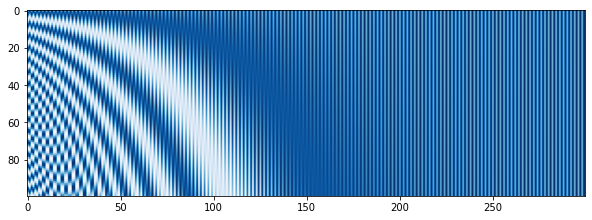

In [3]:
# Time-step별 Position값 시각화

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.imshow(positional_encoding(100, 300), cmap = 'Blues')
plt.show()

# 세로축 Time-step, 가로축 Word Embedding에 더해질 Position 값
# 왜 이 모양이 각 step마다 고유값이 있다고 하는 것인가?

![](https://d3s0tskafalll9.cloudfront.net/media/images/GN-5-L-7.max-800x600.jpg)
<center>Positional Embedding 기법</center>

수식적으로 계산한 Position 값이 아니라 Position에 대한 정보를 감은 Embedding 레이어를 선언하여 위치에 대한 정보를 학습할 수 있게 한것이다.

위와 같은 구조에서 Position Embedding이 훈련 중 값이 변한다고 하더라도 그것은 모든 문장에 대해 동일하게 적용되기에 문제가 되지 않습니다. 오히려 Sinusoid Embedding보다 적합한 값이 학습될 것을 기대할 수도 있다.

하지만 실제로는 두 방법 모두 거의 동일한(±0.1 BLEU) 결과를 보였으며, 저자들은 길이가 길어져도 부담이 없는 Sinusoid Embedding을 채택하였습니다. Positional Embedding은 문장의 길이만큼 Embedding Table의 크기가 커지니까요. Positional Embedding은 추후에 BERT라는 모델에 적용되어 멋진 성능을 보여줄 예정입니다.

# 9-5. Multi-Head Attention

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/GN-5-L-8.jpg)
<center>트랜스포머의 구조 - Multi-Head Attention</center>

위 긂에서 보라색으로 표시된 Masked Multi-Head Attention은 Multi-Head Attention과 동일하지만 인과 관계 마스킹(Causality Masking) 이라는 과정이 하나 더 추가됩니다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/GN-5-L-9.max-800x600.jpg)
<center>Scaled Dot-Porduct Attention / Multi-Head Attention</center>

1. Scaled Dot-Product Attention

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/GN-5-L-10.jpg)
<center>Scaled Dot-Porduct Attention</center>

트랜스포머 논문 원문을 처음볼 때 어려운 부분 중 하나는, 수식도 이해되고 네트워크 구조도 이해한다고해도 그 의미가 직관적으로 잘 와닿지 않는다는 점이다. 특히 그중에서 위 그림에 나오는 Q(query), K(key), V(value)가 어떤 의미를 가지고 있는지 특별한 설명이 없다는 점입니다. 이 3가지의 의미는 오히려 후속 연구들을 통해 더욱 구체적으로 밝혀지고 있는데, 어쩌면 지금 이 시점까지도 계속 새롭게 그 의미가 드러나고 있다고 할 수 있겠습니다.

하지만 2017년 시점으로 돌아가서, 이 Scaled Dot-Product Attention도 결국 그때까지 나왔던 attention 개념의 연장선이었음을 떠올려 봅시다. 그래서 이해를 돕기 위해 이전 시간에 다루어 보았던 Bahdanau attention 개념과 나란히 놓고 비교해 보겠습니다.

아래 그림의 오른쪽은 지난 시간에 배운 전통적인 attention개념이다. seq2seq 인코더-디코더 구조에서 attention이란 바로 디코더의 포지션 i에서 바라본 인코더의 context vector ci를 해석하기 위해, 인코더의 각 포지션 j에 부여한 가중치였습니다. 이 가중치는 디코더의 state si와 인코더의 state hj 사이의 유사도를 통해 계산되었습니다.

원리는 동일하다. 단지 디코더의 state를 Q(query)라고 부르고, 인코더의 state를 K(key)라고 추상화한 것입니다.

그래서 Q와 K의 유사도를 dot product로 계산하여 softmax(QK^T / (dk)^0.5)를 attention 가중치로 삼고, 이것으로 V(value)를 재해석해 준 것이다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/GN-5-L_attentions.max-800x600.png)
<center>Attention</center>

이제 위 그림에서 왼쪽 그링의  Attention(Q, K, V)와 오른쪽 그림의 c_i가 실은 같은 형태이며, softmax(QK^T / (dk)^0.5)와 aij가 같은 역할을 하고 있다는 것을 알 수 있다.

아래 설명을 참고하여 질문에 답을 하도록하자.

[reniew's blog: Transformer: Attention is all you need](https://reniew.github.io/43/)

Q3. Query와 Key를 Dot-Product한 후 Softmax를 취하는 것은 어떤 의미를 가지나요?
- 하나의 query가 모든 key들과 연관성을 계산한뒤 그 값들을 확률 값으로 만들어 주는 것이다. 따라서 query가 어떤 key와 높은 확률로 연관성을 가지는지 알게 되는 것이다. 이제 구한 확률값을 value에 곱해서 value에 대해 scaling한다고 생각하면된다.

Q4. 트랜스포머의 Attention은 위의 식으로 Attention 값을 나눠준다는 것에서 "Scaled" Dot-Product Attention이라고 불립니다. 이 Scale 과정은 어떤 의미를 가지나요? (또는, 왜 필요한가요?)
- dimension이 커질수록 자연스럽게 dot-product값은 점점 더 커질 것이다. 그러나 이후에 softmax함수가 있기 때문에 back-propagation 과정에서도 미분값이 조금만 넘어오게 되서 상대적으로 학습이 느려지거나 학습이 잘안되는 상황이 발생할 수 있다. 그 경우를 대비해 Scale 작업이 필요하다.

정리하자면 Scaled Dot-Product Attention은 Additive(합 연산 기반) Attention과 Dot-Product (=Multiplicative, 곱 연산 기반) Attention 중 후자를 사용한 Attention이고, 차원 수가 깊어짐에 따라 Softmax 값이 작아지는 것을 방지하기 위해 Scale 과정을 포함하였습니다. 이 과정을 본떠 Scaled Dot-Product Attention 이라고 이름이 붙여진 것이다.








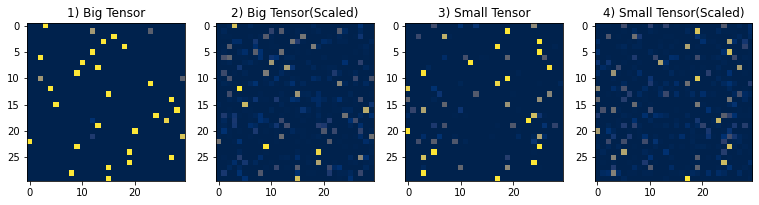

In [7]:
# Attention 속 Softmax의 성질 알아보기

import tensorflow as tf
import matplotlib.pyplot as plt

def make_dot_product_tensor(shape):
  A = tf.random.uniform(shape, minval=-3, maxval=3)
  B = tf.transpose(tf.random.uniform(shape, minval=-3, maxval=3), [1, 0])

  return tf.tensordot(A, B, axes = 1)

length = 30
big_dim = 1024.
small_dim = 10.

big_tensor = make_dot_product_tensor((length, int(big_dim)))
scaled_big_tensor = big_tensor / tf.sqrt(big_dim)
small_tensor = make_dot_product_tensor((length, int(small_dim)))
scaled_small_tensor = small_tensor / tf.sqrt(small_dim)

fig = plt.figure(figsize=(13,6))

ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)

ax1.set_title('1) Big Tensor')
ax2.set_title('2) Big Tensor(Scaled)')
ax3.set_title('3) Small Tensor')
ax4.set_title('4) Small Tensor(Scaled)')

# tf.nn.softmax : 다중 클래스 예측에 사용된다. 

ax1.imshow(tf.nn.softmax(big_tensor, axis=-1).numpy(), cmap='cividis') 
ax2.imshow(tf.nn.softmax(scaled_big_tensor, axis=-1).numpy(), cmap='cividis')
ax3.imshow(tf.nn.softmax(small_tensor, axis=-1).numpy(), cmap='cividis')
ax4.imshow(tf.nn.softmax(scaled_small_tensor, axis=-1).numpy(), cmap='cividis')

plt.show()

모두 같은 범위인 [-3, 3]에서 랜덤 Tensor를 만들어 실제 Attention을 하듯 Dot-Product를 하고, Softmax를 취했다. 위 히트맵에서 어두운 부분으로는 미분값이 흐르기 어렵기 때문에 모델이 넓은 특성을 반영할 수 없게 된다.

즉, 히트맵이 선명할수록 모델의 시야가 편협해진다.

위 시각화를 통해 Embedding의 깊이가 깊을수록 모델의 시야가 편현해지는 문제가 생기고 [1,3], Scale은 그 문제의 좋은 해결책이다. [2,4]는 심지어 깊이에 무관하게 일정한 결과를 만들어내므로 어떤 경우에도 적용할 수 있는 훌륭한 Attention 기법이다.

2. 인과 관계 마스킹(Causality Masking)

Seq2seq 모델을 훈련할 때 Decoder의 첫 입력으로 <start> 토큰을 사용하였다. 그럼 Decoder는 컨텍스트 벡터로 압축된 입력 문장과 <start>토큰만을 단서로 첫 번때 단어를 생성해야 한다. 그 다음 스텝도 같은 단서에 추가로 방금 Decoder 본인이 생성한 첫 번째 단어를 포함하여 두 번째 단어를 생성한다. 이 같은 특성을 자기 회귀라 한다.

하지만 트랜스포머는 모든 단어를 병렬적으로 처리하기에 자기 회귀적인 특성이 없다. 이는 곧 문장을 생성할 수 없다는 의미이다.

이에 논문에서는 자기 회귀적인 특성을 살리기 위해 추가한 것이 바로 인과 관계 마스킹이다. 인과 관계 마스킹은 목표하는 문장의 일부를 인위적으로 연속성을 학습 하게 하는 방법이다.

아래 그림은 인과 관계 마스킹 학습 과정의 예시이다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/causal_masking.max-800x600.png)
<center>인과 관계 마스킹</center>

위의 과정을 거치면 모든 Time-Step에 대한 입력을 한 번에 처리하면서 자기 회귀적인 특성도 유지한다. 테스트 시 소스 문장을 Encoder에 전달하고 타겟 문장은 <start>만 넣더라도 모델이 <start> 토큰만 보고 문장을 생성한 적이 있기 때문에 첫 번째 단어를 생성할 수 있고, 생성된 단어는 다시 입력되어 자기 회귀적인 문장을 생성한다.

이런 이유로 인과 관계 마스크는 대각항을 포함하지 않는 삼각 행렬의 모양을 갖는다. 입력 문장만을 보고 첫 번째 단어를 생성하는 것은 타겟 문장을 모두 가리는 것이 타당하니 대각항을 포함하는게 맞으나, 그런 경우 Attention 값을 구하는 과정에서 마지막(혹은 첫 번째) 행이 0개 요소에 대해 Softmax를 취하게 되므로 오류를 야기한다. 따라서 <start> 토큰을 활용해 마스크가 대각항을 포함하지 않는 형태가 되게 만든 것이다.

[np.eye 보충 설명](https://supermemi.tistory.com/155)

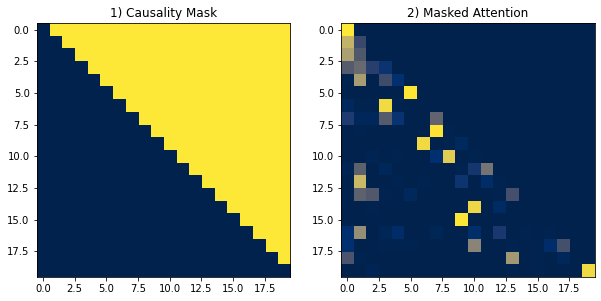

In [11]:
# 인과 관계 마스킹 코드 구현

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def make_dot_product_tensor(shape):
  A = tf.random.uniform(shape, minval=-3, maxval=3)
  B = tf.transpose(tf.random.uniform(shape, minval=-3, maxval=3), [1, 0])

  return tf.tensordot(A, B, axes=1)

def generate_causality_mask(seq_len):
  mask = 1 - np.cumsum(np.eye(seq_len, seq_len), 0)
  # np.eye : (N*M)크기의 2차원 행렬을 만들어 주는 함수 
  return mask

sample_tensor = make_dot_product_tensor((20, 512))
sample_tensor = sample_tensor / tf.sqrt(512.)

mask = generate_causality_mask(sample_tensor.shape[0])

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set_title('1) Causality Mask')
ax2.set_title('2) Masked Attention')

ax1.imshow((tf.ones(sample_tensor.shape) + mask).numpy(), cmap='cividis')

mask *= -1e9
ax2.imshow(tf.nn.softmax(sample_tensor + mask, axis=-1).numpy(), cmap='cividis')

plt.show()

좌측은 실제 마스크의 형태, 우측은 마스킹이 적용된 Attention입니다. 마스킹은 마스킹 할 영역을 -∞로 채우고 그 외 영역을 0으로 채운 배열을 Dot-Product된 값에 더해주는 방식으로 진행됩니다. 후에 진행될 Softmax는 큰 값에 높은 확률을 할당하는 함수이므로 -∞로 가득 찬 마스킹 영역에는 무조건 0의 확률을 할당하게 됩니다.

3. Multi-Head Attention

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/GN-5-L-14.jpg)
<center></center>

Scaled Dot-Product Attention을 이해한다면 Multi-Head Attention 모듈은 간단합니다.

앞서 Embedding이 어떤 추상적인 속성을 담고 있다고 배웠다. Multi-Head Attention은 그 개념을 활용해서 이해를 하면 아주 쉽습니다.

바나나 라는 단어다가 512차원의 Embedding을 가진다고 가정한다. 그중 64차원은 노란색에 대한 정보를, 다른 64차원은 달콤한 맛에 대한 정보를 표현할 것이다. 같은 맥락으로 바나나의 형태, 가격, 유통기한까지 모두 표현될 수 있다. 논문에서 '이 모든 정보들을 섞어서 처리하지 말고, 여러 개의 Head로 나누어 처리하면 Embedding의 다양한 정보를 알 수 있지 않을까?'라는 아이디어를 제시한다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/GN-5-L-15.max-800x600.jpg)
<center>Head가 4개인 Multi-Head Attention 예시</center>

Multi-Head Attention에서 Head는 주로 8개를 사용합니다. Embedding된 10개 단어의 문장이 [10, 512]의 형태를 가진다면, Multi-Head Attention은 이를 [10, 8, 64]로 분할하여 연산합니다. 각 64차원의 Embedding을 독립적으로 Attention한 후, 이를 이어붙여 다시금 [10, 512]의 형태로 되돌리며 연산은 끝이 납니다.

여기서 나눠진 64차원이 연관 있는 것들끼리 묶여있을 거란 보장이 없다는 생각이 들 수 있다.

Head로 나눈 Embedding끼리 유사한 특성을 가진다는 보장이 없기 때문에 앞단의 linear 레이어를 추가해준다. Linear 레이어는 데잍를 특정 분포로 매핑시키는 역할을 해주기 때문에, 설령 단어들의 분포가 제각각이라도 Linear 레이어는 Multi-Head Attention이 잘 동작할 수 있는 적합한 공간으로 Embedding을 매핑합니다.

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/GN-5-L-16.jpg)
<center>Linear 적용</center>

비슷한 이유로 각각의 Head가 Attention 한 값이 균일한 분포를 가질 거란 보장이 없습니다. 따라서 모든 Attention 값을 합쳐준 후, 최종적으로 Linear 레이어를 거치며 비로소 Multi-Head Attention이 마무리가 됩니다.



# 9-6. Position-wise Feed-Forward Networks

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/GN-5-L-17.jpg)
<center>Position-wise Feed-Forward Networks</center>

Position-wise Feed-Forward Network는 위의 Multi-Head Attention만큼 센세이셔널하지는 않습니다. 그래서 논문에서도 큰 분량을 차지하지 않는 개념이죠. 양이 많지 않으니 논문의 구절을 그대로 읽어보시는 것을 추천드립니다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/GN-5-L-18.max-800x600.jpg)
<center>Position-wise Feed-Forward Network 내용</center>

W는 Linear 레이어를 의미하고, max(0,x) 함수는 활성 함수 ReLU이다. 예를 들면 10단어로 이루어진 Attention된 문장 [10, 512]를 [10, 2048] 공간으로 매핑, 활성함수를 적용한 후 다시 [10, 512] 공간으로 되돌리는 것입니다. 이를 그림을 더해 쉽게 설명한 글을 첨부해드리니 읽어보세요! Position-wise Feed-Forward Networks 부분입니다.

[Attention is all you need paper 뽀개기](https://pozalabs.github.io/transformer/)

Q5. FFN 앞에 Position-Wise라는 수식이 붙는 이유는 무엇인가요?
- FFN 연산이 개별 단어(Position)마다 적용되기 때문이다.

Q6. (OX문제)앞서 트랜스포머는 여러 개의 Encoder와 Decoder를 쌓아 완성한다고 했는데요. 각 레이어의 Position-wise Feed-Forward Networks는 Parameter를 공유하나요?
- X, 레이어가 달라지면 다른 Parameter를 사용한다.



![](https://d3s0tskafalll9.cloudfront.net/media/images/GN-5-L_1dconv.max-800x600.png)
<center>Linear 연산을 CNN으로 구현</center>

위 그림을 보면 한 단어를 Embedding 차원 만큼의 채널을 갖는 이미지라고 생각해보자. Convolution 레이어의 Weight는 [입력 차원 수 * 출력 차원 수 * 커널의 크기] 이므로 커널의 크기가 1이라면 Linear 레이어와 동일한 크기의 Weight를 갖게 된다.

최근에는 구글에서 AI를 만드는 AI, AutoML을 활용해 최적의 트랜스포머 구조를 찾아내기도 했습니다. 진화된 트랜스포머(Evolved Transformer) 는 두 층의 레이어 중 아래층 레이어에서 차이를 보이는데, 이때 Linear 레이어를 Convolution 레이어로 표기하는 방식을 택합니다. 궁금하신 분들은 아래 웹페이지에서 진화된 트랜스포머의 구조를 살펴보세요! (글은 지금 읽지 않으셔도 괜찮습니다.)

[Applying AutoML to Transformer Architectures](https://ai.googleblog.com/2019/06/applying-automl-to-transformer.html)




# 9-7. Additional Techniques

이번 단계에서는 트랜스포머의 세부적인 부분을 다룰 것이다. 성능에 영향을 주기 때문에 잘 숙지하여야한다.

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/GN-5-L-20.jpg)
<center>Add & Norm</center>

1. Layer Normalization

Layer Normalization은 데이터를 Feature 차원에서 정규화를 하는 방법이다. 또 다시 10단어의 Embedding된 문장을 예호 [10, 512]에서 512차원 Feature를 정규화하여 분포를 일정하게 맞춰주는 것이다. Layer Normalization 방법이 있고, 약간 논외지만 Regularization과 Generalization 등 우리를 헷갈리게 하는 많은 방법들이 있습니다. 다행히도 아랫글에서 모든 개념을 쉽게 정리해 주고 있으니, 살펴보시길 적극 권장합니다!

[Introduction to Deep Learning Normalization](https://subinium.github.io/introduction-to-normalization/)

Q7. 데이터 Feature의 Scale을 직접적으로 조정하는 방법은 무엇인가요? 그 이유로 Feature Scaling이라고 불리기도 합니다!
- 정규화(Normalization)

Q8. Batch Normalization과 Layer Normalization의 차이점을 적어주세요. (대표적인 한 가지만 적어도 충분합니다!)
- Batch Normalization은 정규화를 Batch 차원에서 진행하는 것이고 Layer Normalization은 정규화를 Feature 차원에서 진행하는 것이다.

2. Residual Connection

Skip Connection이라고도 부르는 Residual Connection이 처음 제안된 것은 2015년 ResNet이라는 모델과 함께였습니다. ResNet은 자연어 처리를 공부하는 우리에겐 다소 낯선 이름인데요, 컴퓨터 비전에서는 트랜스포머만큼이나 유명한 모델이랍니다! 모델 자체를 완벽히 이해할 필요는 없지만, 등장 배경이 된 멋진 아이디어는 알아두면 좋습니다. 아래 웹페이지에서 좋은 맛보기 자료를 제공해 주고 있네요!

[(7) ResNet (Residual Connection)](https://itrepo.tistory.com/36)

Q9. 상식적으로 56개의 레이어를 갖는 네트워크는 20개의 레이어를 갖는 네트워크보다 성능이 좋아야 합니다. 하지만 그렇지 않았죠! 이유가 무엇인가요?
- 네트워크가 깊어질 수록 Optimize(Train)하는 것이 어렵기 때문에, 얕은 네트워크가 더 좋은 성능을 보이게 된다.

Q10. Residual Block은 굉장히 간단한 수식으로 표현이 가능합니다. 수식을 적어보세요.
- y = f(x) + x

3. Learning Rate Schedular

트랜스포머를 훈련하는 데에는 Adam Optimizer를 사용했는데, 특이한 점은 Learning Rate를 수식에 따라 변화시키며 사용했다는 것입니다. 수식은 아래와 같습니다.

lrate = d_model^-0.5 * min((step_num)^-0.5, step_num = wramup_steps^-1.5)

위 수식을 따르게 되면 warmup\_stepswarmup_steps까지는 lratelrate가 선형적으로 증가 하고, 이후에는 step\_numstep_num에 비례해 점차 감소하는 모양새 를 보이게 됩니다.


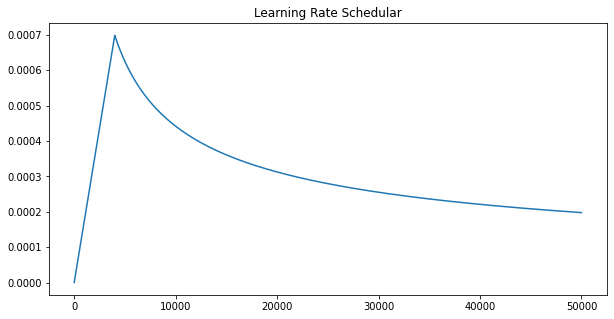

In [13]:
# Learning Rate Schedular 표현

import matplotlib.pyplot as plt
import numpy as np

d_model = 512
warmup_steps = 4000

lrates = []

for step_num in range(1, 50000):
  lrate = (np.power(d_model, -0.5)) * np.min([np.power(step_num, -0.5), 
                                              step_num * np.power(warmup_steps, -1.5)])
  
  lrates.append(lrate)

plt.figure(figsize=(10, 5))
plt.title('Learning Rate Schedular')
plt.plot(lrates)
plt.show()

이와 같은 Learning Rate를 사용하면 초반 학습이 잘되지 않은 상태에서의 학습 효율이 늘어나고, 어느 정도 학습이 된 후반에는 디테일한 튜닝을 통해 Global Minimum을 찾아가는 효과가 나게 됩니다. 학습의 초반과 후반은 warmup_steps 값에 따라 결정되고요.

4. Weight Sharing

Weight Sharing은 모델의 일부 레이어가 동일한 사이즈의 Weight를 가질 때 종종 등장하는 테크닉이다. 하나의 Weight를 두 개 이상의 레이어가 동시에 사용하도록 하는 것인데, 대표적으로 언어 모델의 Embedding 레이어와 최종 Linear 레이어가 동일한 사이즈의 Weight를 가진다. 프로그래밍 개념 중 Call By Referce와 비슷한 느낌이다.

이는 비효율적으로 보일 수 있다. 출력층의 Linear 레이어는 그만의 역할이 있을 것이고 Embedding 레이어 또한 그럴 것인데, 둘을 서로 엮어버리면 이도 저도 아닌 것 같은 느낌이 든다. 하지만 앞서 ResNet이 증명한 것처럼 많은 Weight가 곧 성능으로 이어지지 않고, 오히려 Optimaizer에서 불리한 경향을 보인다는 것을 생각하면 이해하기 쉽다.

실제로 Weight Sharing을 튜닝해야 할 파라미터 수가 감소하기 때문에 학습에 더 유리하며 자체적으로 Regularization 되는 효과도 있습니다. 유연성이 제한되어 과적합을 피하기 좋아지기 때문이다.

트랜스포머에서는 Decoder의 Embedding 레이어와 출력층 Linear 레이어의 Weight를 공유하는 방식을 사용했습니다. 소스 Embedding과 타겟 Embedding도 논문상에서는 공유했지만 이는 언어의 유사성에 따라서 선택적으로 사용합니다. 만일 소스와 타겟 Embedding 층까지 공유한다면 3개의 레이어가 동일한 Weight를 사용하는 셈이다.

또한 출력층 Linear 레이어와 Embedding 레이어의 Feature 분포가 다르므로 Embedding 된 값에 d_model의 제곱근 값을 곱해줍니다. 이는 분포를 맞춰줌과 동시에 Positional Encoding이 Embedding 값에 큰 영향을 미치는 것을 방지해 줍니다.



# 9-8. 트랜스포머, 그 후엔

트랜스포머가 NLP의 꽃이라는 것은 학계의 수많은 관련 논문들이 증명합니다! 이번 스텝에서는 트랜스포머를 기반으로 발전한 큰 줄기들을 간단하게 소개해 드리겠습니다.

가장 먼저 등장한 것은 BERT와 GPT였습니다. 두 모델 다 엄청난 양의 데이터를 기반으로 훈련되어 경이로운 성능을 보여줬죠. 이들을 잘 소개한 글을 첨부합니다. 아랫글을 읽고 다음 질문에 답해 주세요.

[BERT와 GPT](https://ratsgo.github.io/nlpbook/docs/language_model/bert_gpt/#gpt)

Q11. GPT와 BERT의 차이점에 대해 3가지만 적어보세요.
- GPT는 단방향 Attention을 사용하지만 BERT는 양방향 Attetion을 사용한다.
- GPT는 트랜스포머에서 디코더(decoder)만 사용하고 BERT는 인코더(encoder)만 사용한다.
- GPT는 문장을 생성할 수 있지만 BERT는 문장의 의미를 추출하는 데 강점을 가지고 있다.

오늘 소개한 트랜스포머는 max_sequence_length를 512에서 1024 정도로만 사용합니다. 그래서 초기에는 주로 몇 개 문장 단위의 번역 작업에 활용되었죠. 문단의 문맥을 파악하는 수준까지의 보다 긴 입력 길이를 처리할 수 있도록, 기존의 트랜스포머에 Recurrence라는 개념을 추가한 Transformer-XL이 제안되기도 했습니다. 간단한 이해를 하기에는 아랫글이 아주 적합합니다!

[Transformer-XL 자료 정리 및 설명요약](https://comeng.tistory.com/entry/Transformer-XL-%EC%9E%90%EB%A3%8C%EC%A0%95%EB%A6%AC-%EB%B0%8F-%EC%84%A4%EB%AA%85%EC%9A%94%EC%95%BD)

지금에 이르러서는 모델 성능이 극대화되어 성능을 높이고자 하는 연구보단 연산량을 줄이고자 하는 연구가 늘고 있습니다. Reformer는 트랜스포머를 연산량 측면에서 혁신적으로 개선한 모델입니다

[Reformer:효율적인 트랜스포머](https://brunch.co.kr/@synabreu/31)

이 흐름에서 등장한 재미있는 아이디어 중 하나는 "Multi-Head Attention에서 모든 Head가 과연 필요한가?" 라는 주장입니다. 이 또한 시야를 넓히는 데에 도움이 되니 가볍게 읽어보시길 권장합니다!

[월간 자연어 처리 - MHA](https://www.facebook.com/permalink.php?story_fbid=156092245822648&id=111809756917564)

[(논문리뷰) Are Sixteen Heads Really Better than One?](https://littlefoxdiary.tistory.com/m/66?category=847374)

이 외에도 XLNet, ELECTRA, RoBERTa, GPT-3... 놀라운 것들은 너무나도 많지만 우리에게 주어진 시간이 한정적이니 필요한 것을 빠르게 훑는 기술도 필요하겠죠. 위에 소개해드린 큰 줄기 중 관심이 동하는 부분이 있다면 그쪽으로 파생된 모델들을 차근차근 훑어가는 것도 좋은 공부가 될 것 같네요!